# 时间序列
1.移动平均值<br/>
2.窗口函数<br/>
3.自相关

## 移动平均值

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=11,center=False).mean()
  
D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,center=False).mean()
  if __name__ == '__main__':


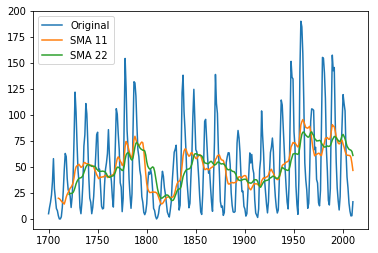

In [2]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd
from pandas.stats.moments import rolling_mean
df=pd.read_csv('sunactivity.csv')
year_range=df["YEAR"].values
plt.plot(year_range,df["SUNACTIVITY"].values,label="Original")
plt.plot(year_range,rolling_mean(df,11)["SUNACTIVITY"].values,label="SMA 11")#以11年为周期的简单移动平均
plt.plot(year_range,rolling_mean(df,22)["SUNACTIVITY"].values,label="SMA 22")#以22为周期的简单移动平均
plt.legend()#显示图例
plt.show()

## 窗口函数

窗口函数：<br/>
  窗口函数是定义在一个区间（窗口）上的函数，超出定义域，函数取值为0。我们可以使用它们来分析频谱、设计滤波器等。

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,win_type=boxcar,center=False,axis=0).mean()
  # Remove the CWD from sys.path while we load stuff.
D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,win_type=triang,center=False,axis=0).mean()
  # Remove the CWD from sys.path while we load stuff.
D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,win_type=blackman,center=False,axis=0).mean()
  # Remove the CWD from sys.path while we load stuff.
D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.r

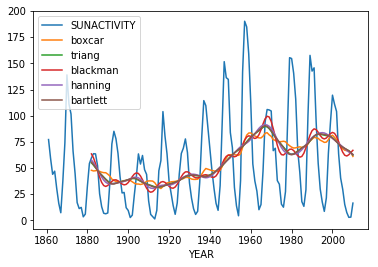

In [3]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd
from pandas.stats.moments import rolling_window
data_loader=pd.read_csv('sunactivity.csv')
df=data_loader.tail(150)
df=pd.DataFrame({'SUNACTIVITY':df['SUNACTIVITY'].values},index=df['YEAR'])
ax=df.plot()
def plot_window(win_type):
    df2=rolling_window(df,22,win_type)
    df2.columns=[win_type]
    df2.plot(ax=ax)
plot_window('boxcar')
plot_window('triang')
plot_window('blackman')
plot_window('hanning')
plot_window('bartlett')
plt.show()

## 自相关

[ 9 11 10  1  0]


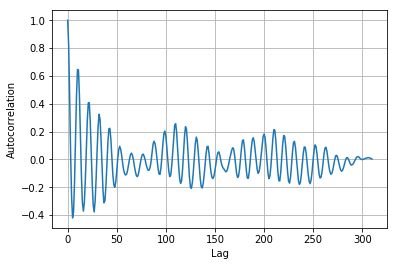

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


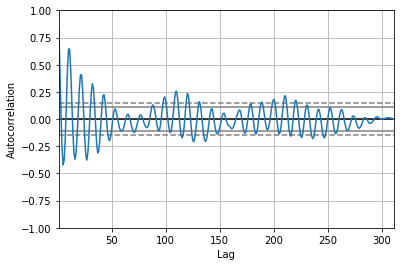

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from pandas.tools.plotting import autocorrelation_plot
data_loader=pd.read_csv('sunactivity.csv')
data=data_loader["SUNACTIVITY"].values
y=data-np.mean(data)
norm=np.sum(y**2)
correlated=np.correlate(y,y,mode='full')/norm
res=correlated[len(correlated)//2:]
print(np.argsort(res)[-5:])#argsort返回数组排序后对应的下标
plt.plot(res)
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()
autocorrelation_plot(data)
plt.show()

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  # Remove the CWD from sys.path while we load stuff.


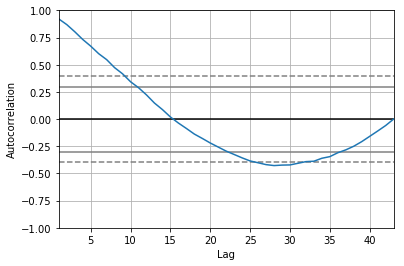

In [5]:
#自相关图
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
df=pd.read_csv('transcount.csv')
df=df.groupby('year').aggregate(np.mean)
gpu=pd.read_csv('gpu_transcount.csv')
gpu=gpu.groupby('year').aggregate(np.mean)
df=pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df=df.replace(np.nan,0)
autocorrelation_plot(np.log(df['trans_count']))
plt.show()

相关性的95%置信区间（实线），相关性为99%的置信区间（虚线）。<br/>

较之时间上越远的数值，当前的数值与时间上越近的数值相关性越大；当时间延迟极大时，相关性衰减为0。